<a href="https://colab.research.google.com/github/mmjck/MachineLearning/blob/master/Pr%C3%A1tico_02_An%C3%A1lise_Descritiva_de_Dadosipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from IPython.display import display


In [2]:
import pandas as pd
import math
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


In [3]:
url = "http://archive.ics.uci.edu/ml/machine-learning-databases/forest-fires/forestfires.csv"

In [20]:
dfFires = pd.read_csv(url)


In [21]:
dfFires.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


In [160]:
def return_dataframe_groupyby(dataframe, att):
    return pd.DataFrame({ att: dataframe[att].value_counts().keys(), 'total': dataframe[att].value_counts().values  })


return_dataframe_groupyby(dfFires, "month")

,month,total
0,aug,184
1,sep,172
2,mar,54
3,jul,32
4,feb,20
5,jun,17
6,oct,15
7,dec,9
8,apr,9
9,may,2


####Setando um número de Classes. Escolhido a quantidade que for melhor (Sugerido de 5 a 20)

In [24]:
numClasses = 5


In [25]:
def calculate_dis_freq(column, dataframe):
    maiorValor = 1
    menorValor = 1
    amplitude = 1
    
    if column == "month" or  column == "day" :
        columnValues = dataframe[column].value_counts()

        maiorValor = int(dataframe[column].value_counts().max())
        menorValor = int(dataframe[column].value_counts().min())
        
        
        amplitude = maiorValor - menorValor

        return amplitude, menorValor, maiorValor
    
    
    maiorValor = int(dataframe[column].max())
    menorValor = int(dataframe[column].min())
    amplitude = maiorValor - menorValor

    return amplitude, menorValor, maiorValor

In [26]:
def calculate_lim_inf(amplitude, menorValor, maiorValor, nClasses):
    amplitudeClasse = amplitude / nClasses
    limiteInfInicial = menorValor
    limiteInfClasse = []
    limiteInfClasse.append(limiteInfInicial)

    for i in range(nClasses - 1):
        limiteInfClasse.append(math.ceil(limiteInfClasse[-1] + amplitudeClasse))

    return limiteInfClasse


In [27]:
def calculate_lim_sup(amplitude, menorValor, maiorValor, nClasses):
    amplitudeClasse = amplitude / nClasses
    limiteInfInicial = menorValor
    limiteSuperiorClasse = []
    limiteSuperiorClasse.append(math.floor(limiteInfInicial + amplitudeClasse))

    for i in range(nClasses - 1):
        limiteSuperiorClasse.append(math.ceil(limiteSuperiorClasse[-1] + amplitudeClasse))

    return limiteSuperiorClasse


In [28]:
def generate_labels(dataframe, column, nClasses, limiteSuperiorClasse, limiteInferiorClasse):
    rotulos = []
    value = 0

    df =  dataframe
    if column == "month" or column == "day":
        dfaux = pd.DataFrame({ 
            'value': dfFires[column].value_counts().keys(),
            column: dfFires[column].value_counts().values  
        })
        df = dfaux
        
    for i in range(len(df)):
       
        value = int(df.loc[i, column])
        
        #Descobrindo a classe que se encaixa a value
        for j in range(nClasses):
            if limiteInfClasse[j] <= value and value <= limiteSuperiorClasse[j]:
                rotulos.append(j + 1)
                break

    #Transformando a lista rotulos para uma serie , por ser mais facil de fazer filtragem
    rotulos = pd.Series(rotulos)
    return rotulos

In [29]:
def resume_dis(nClasses, limiteInferiorClasse, limiteSuperiorClasse, rotulos):
    #Inicializando uma variavel do tipo DataFrame contendo apenas os valores das colunas
    columnsDataFrame = ["Classe","Limite Inferior","Ponto Médio","Limite Superior", "Frequência Absoluta", "Frequência Relativa", "Frequência Acumulada Absoluta", "Frequência Acumulada Relativa"]
    resumoDistrFrequencia = pd.DataFrame(columns=columnsDataFrame)

    #Percorrendo atraves do numero de Classes
    for ind in range(nClasses):
        #Dicionario de insercao no Dataframe
        dictInsert = {  
            "Classe": (ind + 1),
            "Limite Inferior": (limiteInferiorClasse[ind]),
            "Ponto Médio": ((limiteSuperiorClasse[ind]+limiteInferiorClasse[ind])/2),
            "Limite Superior": limiteSuperiorClasse[ind], 
            "Frequência Absoluta": len(rotulos[rotulos==(ind+1)]), 
            "Frequência Relativa":len(rotulos[rotulos==(ind+1)])/len(rotulos)*100, 
            "Frequência Acumulada Absoluta": sum(resumoDistrFrequencia["Frequência Absoluta"]) + len(rotulos[rotulos==(ind+1)]) , 
            "Frequência Acumulada Relativa": (sum(resumoDistrFrequencia["Frequência Absoluta"]) + len(rotulos[rotulos==(ind+1)]))/len(rotulos)*100
        }  
        resumoDistrFrequencia = resumoDistrFrequencia.append(dictInsert,ignore_index=True)

    resumoDistrFrequencia = resumoDistrFrequencia.astype({
        "Classe": int,
        "Limite Inferior": int,
        "Ponto Médio": float,
        "Limite Superior": int, 
        "Frequência Absoluta": int, 
        "Frequência Relativa": float, 
        "Frequência Acumulada Absoluta": int, 
        "Frequência Acumulada Relativa": float   
    })

    return resumoDistrFrequencia

In [30]:
list_columns = ["day", "month","DMC", "DC","ISI"]

In [31]:
list_dataframes = []


for column in list_columns:
    amplitude, menorValor, maiorValor = calculate_dis_freq(column, dataframe=dfFires)
    limiteInfClasse = calculate_lim_inf(amplitude=amplitude, menorValor=menorValor, maiorValor=maiorValor, nClasses=numClasses)
    limiteSupClasse = calculate_lim_sup(amplitude=amplitude, menorValor=menorValor, maiorValor=maiorValor, nClasses=numClasses)

    labels = generate_labels(dataframe=dfFires, column=column, nClasses=numClasses, limiteSuperiorClasse=limiteSupClasse, limiteInferiorClasse=limiteInfClasse)
    DFResume = resume_dis(nClasses=numClasses, limiteInferiorClasse=limiteInfClasse, limiteSuperiorClasse=limiteSupClasse, rotulos=labels)
    
    
    list_dataframes.append({ "dataframe": DFResume, "column" : column })
    
    
    print("Para a o atributo " + column)
    display(DFResume.head())
    
    

Para a o atributo day


,Classe,Limite Inferior,Ponto Médio,Limite Superior,Frequência Absoluta,Frequência Relativa,Frequência Acumulada Absoluta,Frequência Acumulada Relativa
0,1,54,58.0,62,2,28.571429,2,28.571429
1,2,63,67.0,71,1,14.285714,3,42.857143
2,3,72,76.0,80,1,14.285714,4,57.142857
3,4,81,85.0,89,2,28.571429,6,85.714286
4,5,90,94.0,98,1,14.285714,7,100.000000


Para a o atributo month


,Classe,Limite Inferior,Ponto Médio,Limite Superior,Frequência Absoluta,Frequência Relativa,Frequência Acumulada Absoluta,Frequência Acumulada Relativa
0,1,1,19.0,37,9,75.000000,9,75.000000
1,2,38,56.0,74,1,8.333333,10,83.333333
2,3,75,93.0,111,0,0.000000,10,83.333333
3,4,112,130.0,148,0,0.000000,10,83.333333
4,5,149,167.0,185,2,16.666667,12,100.000000


Para a o atributo DMC


,Classe,Limite Inferior,Ponto Médio,Limite Superior,Frequência Absoluta,Frequência Relativa,Frequência Acumulada Absoluta,Frequência Acumulada Relativa
0,1,1,30.0,59,126,24.371373,126,24.371373
1,2,59,88.0,117,171,33.075435,297,57.446809
2,3,117,146.0,175,149,28.820116,446,86.266925
3,4,175,204.0,233,46,8.897485,492,95.164410
4,5,233,262.0,291,25,4.835590,517,100.000000


Para a o atributo DC


,Classe,Limite Inferior,Ponto Médio,Limite Superior,Frequência Absoluta,Frequência Relativa,Frequência Acumulada Absoluta,Frequência Acumulada Relativa
0,1,7,92.0,177,88,17.021277,88,17.021277
1,2,178,263.0,348,16,3.094778,104,20.116054
2,3,349,434.0,519,47,9.090909,151,29.206963
3,4,520,605.0,690,176,34.042553,327,63.249516
4,5,691,776.0,861,190,36.750484,517,100.000000


Para a o atributo ISI


,Classe,Limite Inferior,Ponto Médio,Limite Superior,Frequência Absoluta,Frequência Relativa,Frequência Acumulada Absoluta,Frequência Acumulada Relativa
0,1,0,5.5,11,405,78.336557,405,78.336557
1,2,12,17.5,23,111,21.470019,516,99.806576
2,3,24,29.5,35,0,0.000000,516,99.806576
3,4,36,41.5,47,0,0.000000,516,99.806576
4,5,48,53.5,59,1,0.193424,517,100.000000


In [32]:
list_dataframes[0]

{'column': 'day', 'dataframe':    Classe  ...  Frequência Acumulada Relativa
 0       1  ...                      28.571429
 1       2  ...                      42.857143
 2       3  ...                      57.142857
 3       4  ...                      85.714286
 4       5  ...                     100.000000
 
 [5 rows x 8 columns]}

In [33]:
display(list_dataframes[0]["dataframe"])

,Classe,Limite Inferior,Ponto Médio,Limite Superior,Frequência Absoluta,Frequência Relativa,Frequência Acumulada Absoluta,Frequência Acumulada Relativa
0,1,54,58.0,62,2,28.571429,2,28.571429
1,2,63,67.0,71,1,14.285714,3,42.857143
2,3,72,76.0,80,1,14.285714,4,57.142857
3,4,81,85.0,89,2,28.571429,6,85.714286
4,5,90,94.0,98,1,14.285714,7,100.000000


**Exercício 2.** Visualização de dados


**Especificação:** Para cada um dos cinco atributos (Dia, Mês, DMC, DC e ISI), gere os
seguintes gráficos: (i) histogramas das frequências relativas e absolutas; (ii) gráfico de
polígonos; (iii) gráfico de setores; (iv) gráfico de Pareto; (v) gráfico de dispersão entre
cada dois atributos, ou seja, DMC x Dia, DMC x Mês, DMC x DC, DMC x ISI, DC x Dia, DC
x Mês, DC x ISI, ISI x Dia, ISI x Mês, Dia x Mês. Além dos gráficos, inclua comentários
sobre as informações obtidas pelas análises dos gráficos, deixando claro o gráfico e a
informação obtida.


**Entregável:** implemente um programa que, baseado nos dados, plote os gráficos
definidos acima. Os comentários sobre as informações obtidas pelas análises dos
gráficos devem ser enviados em um arquivo PDF à parte.
**Observações**: o livro texto traz exemplos de alguns gráficos sobre alguns dos atributos;
o Jupyter Notebook disponibilizado no material de estudos tem exemplos de como
construir os gráficos acima

In [43]:

def generate_hist_freqs(dataframe, att):

    fig,axes = plt.subplots(nrows=1, ncols=2, figsize=(10,4))
    classe =  [str(dataframe.loc[i,"Limite Inferior"])+" - " + str(dataframe.loc[i,"Limite Superior"]) for i in range(len(dataframe.values))]

    axes[0].bar(classe,dataframe["Frequência Absoluta"])
    axes[0].set_title("a) Frequência Absoluta")
    axes[0].set(xlabel = "Classe " + att, ylabel = "Frequência Absoluta")


    axes[1].bar(classe,dataframe["Frequência Relativa"])
    axes[1].set_title("b) Frequência Relativa")
    axes[1].set(xlabel = "Classe " + att, ylabel = "Frequência Relativa (em %)")


    fig.suptitle("Histograma do atributo " + att + " para a amostra da base de fires")
    fig.show()



In [45]:

def generate_graph_polig(dataframe, att):
    classe =  [str(dataframe.loc[i,"Limite Inferior"])+" - "+str(dataframe.loc[i,"Limite Superior"]) for i in range(len(dataframe.values))]

    plt.plot(classe,dataframe["Frequência Absoluta"], marker='o')
    plt.xlabel("Classe " + att )
    plt.ylabel("Frequência Absoluta")

    plt.suptitle("Polígono de Frequências do atributo " + att + " para a amostra da base de fires")
    plt.show()


In [46]:
def generate_graph_pareto(dataframe, att):
    classe =  [str(dataframe.loc[i-1,"Limite Inferior"])+" - "+str(dataframe.loc[i-1,"Limite Superior"]) for i in dataframe.sort_values(by='Frequência Absoluta',ascending=False)["Classe"].values]

    plt.bar(classe,dataframe.sort_values(by='Frequência Absoluta',ascending=False)["Frequência Absoluta"])
    plt.xlabel("Classe " + att )
    plt.ylabel("Frequência Absoluta")

    plt.suptitle("Polígono de Frequências do atributo " + att + " para a amostra da base de fires")
    plt.show()

In [47]:
def generate_graph_set(dataframe, att):
    classe =  [str(dataframe.loc[i,"Limite Inferior"])+" - "+str(dataframe.loc[i,"Limite Superior"])  for i in range(len(dataframe.values))]

    plt.pie(x=dataframe['Frequência Relativa'], labels=classe, autopct='%.0f%%',startangle=90)

    plt.show()

In [48]:
def generate_graph_disp(dataframe, att, xatt):
    df = dataframe
    dfAuxiliar = df.sort_values(by=xatt)
    dfAuxiliar = dfAuxiliar
    plt.scatter(dfAuxiliar[att], dfAuxiliar[xatt])
    plt.gcf().set_size_inches(5, 7) 
    plt.show()

i)

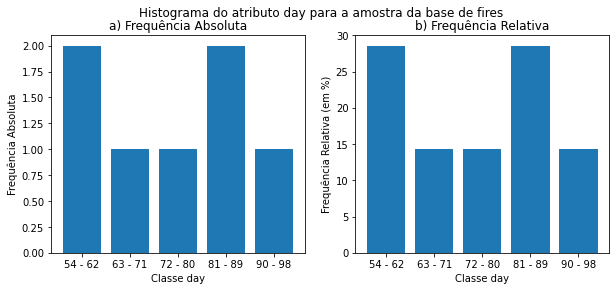

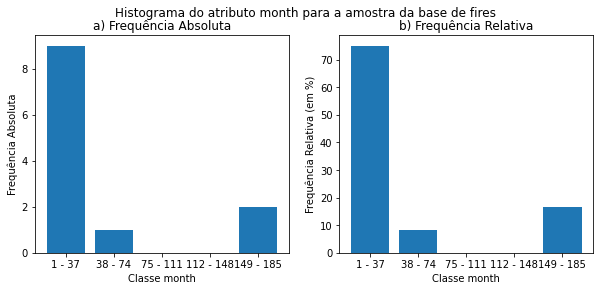

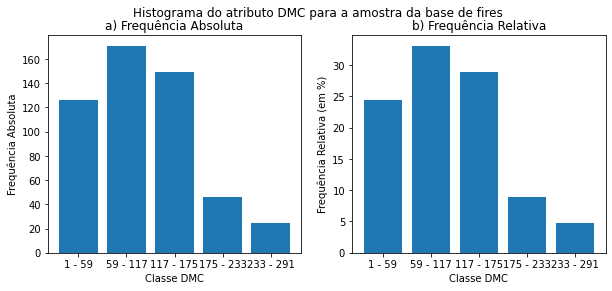

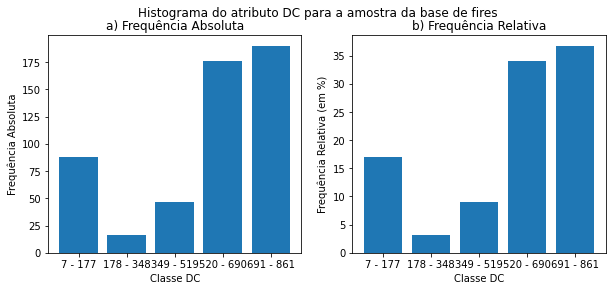

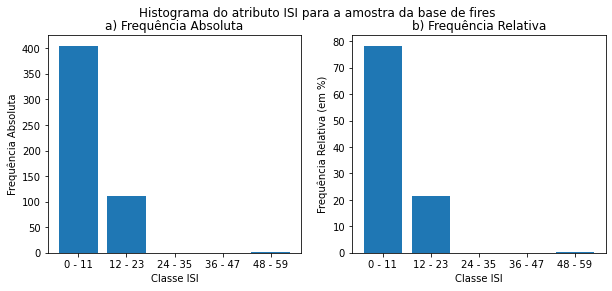

In [49]:
for value in list_dataframes:
    generate_hist_freqs(value["dataframe"], value["column"])

ii)


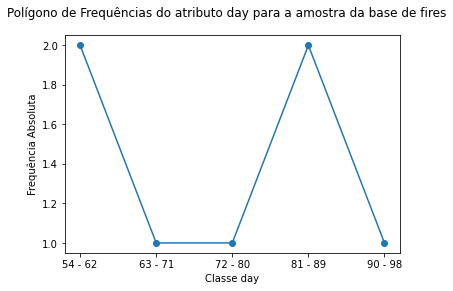

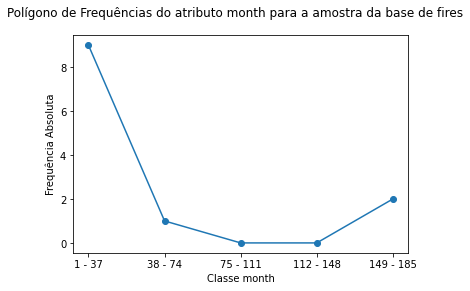

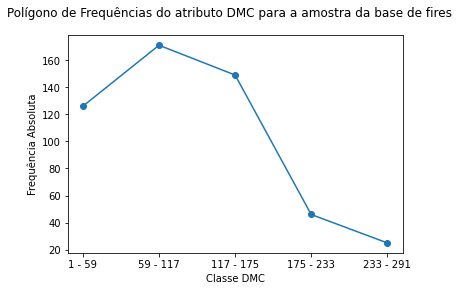

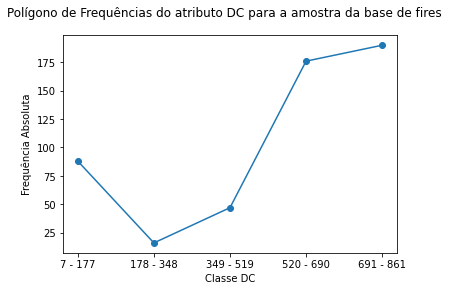

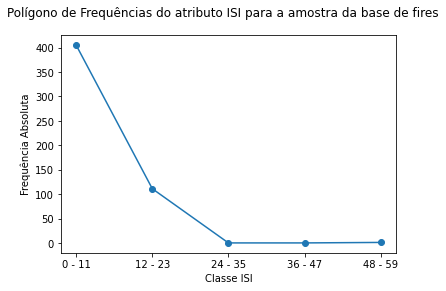

In [50]:
for value in list_dataframes:
    generate_graph_polig(value["dataframe"], value["column"])


iii)

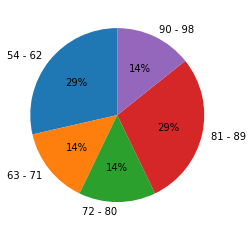

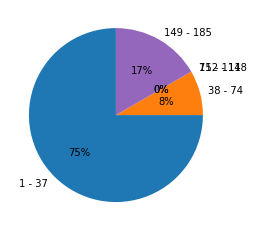

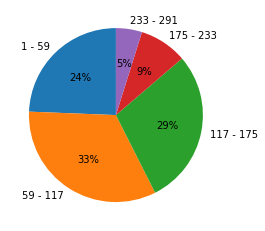

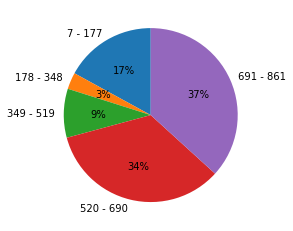

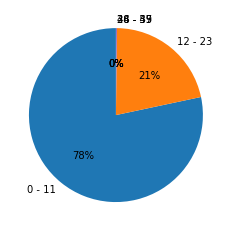

In [51]:
for value in list_dataframes:
    generate_graph_set(value["dataframe"], value["column"])


iv)

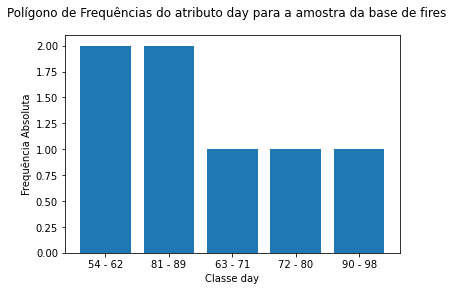

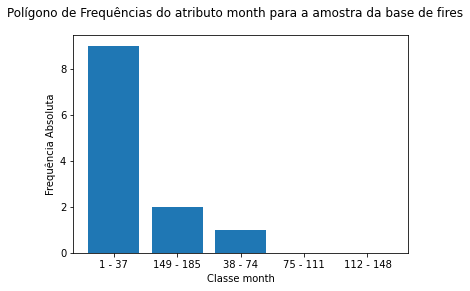

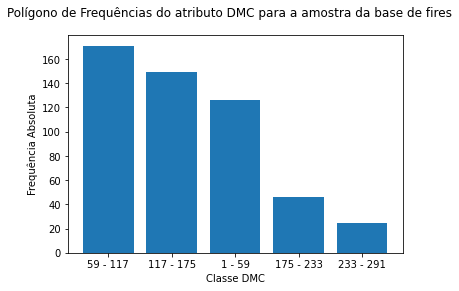

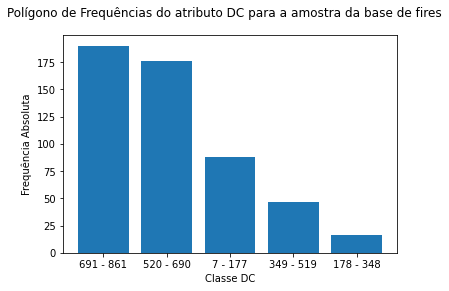

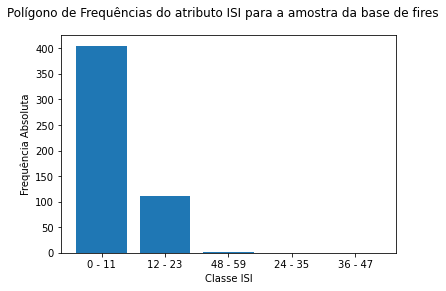

In [52]:
for value in list_dataframes:
    generate_graph_pareto(value["dataframe"], value["column"])


v)

In [53]:
list_columns

['day', 'month', 'DMC', 'DC', 'ISI']

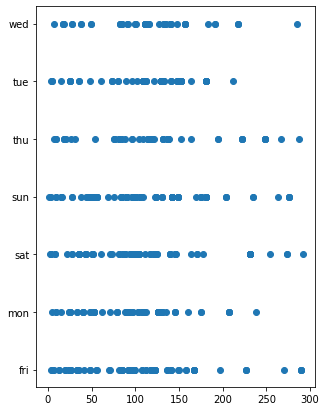

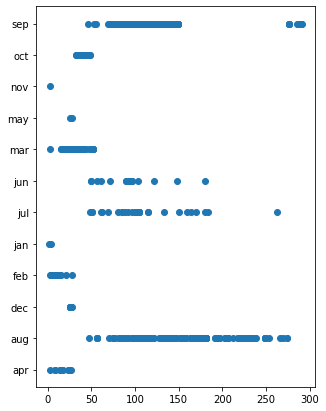

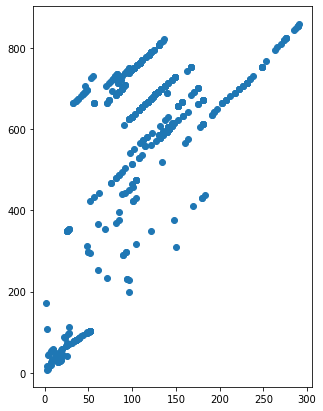

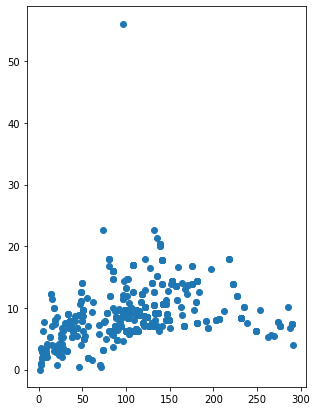

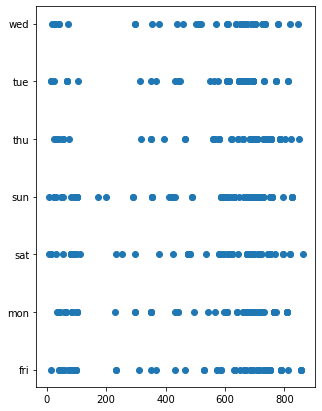

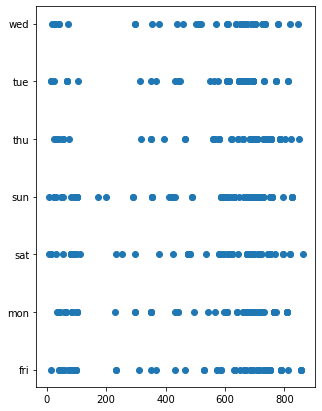

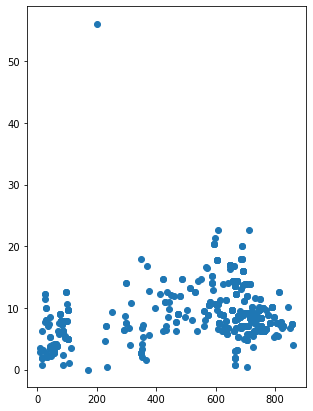

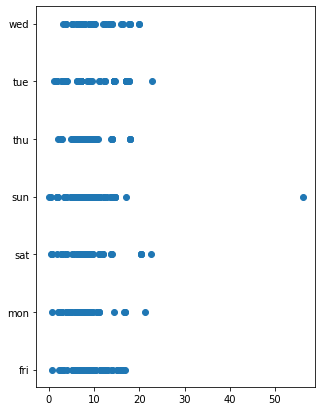

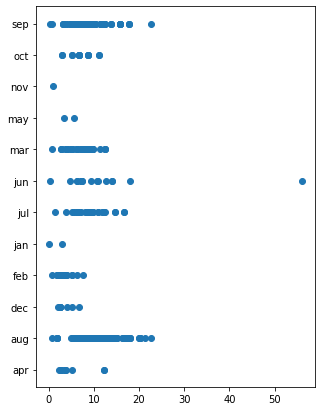

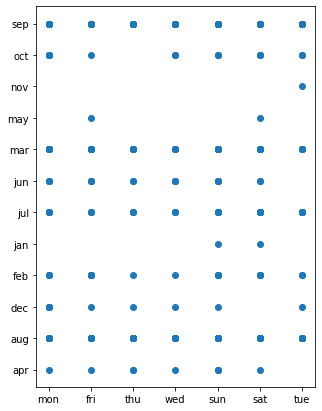

In [161]:
list_ass = ['DMC-day', 'DMC-month', 'DMC-DC', 'DMC-ISI', 'DC-day', 'DC-day', 'DC-ISI', 'ISI-day', 'ISI-month', 'day-month']
for value in list_ass:
    att, xatt = value.split('-')
    

    generate_graph_disp(dfFires, att=att, xatt=xatt)


**Exercício 3**. Medidas Resumo


**Especificação**: gere as medidas de tendência central (média, moda (quando for o
caso), ponto médio e mediana), dispersão (amplitude, desvio padrão, variância,
coeficiente de variação) e forma (assimetria e curtose), para cada um dos cinco
atributos (Dia, Mês, DMC, DC e ISI).


**Entregável**: implemente um programa que calcule e imprima a tabela contendo todas
as informações acima.


Observação: a impressão da tabela pode ser em uma única tabela ou em três tabelas
separadas.

In [77]:
def calculate_mean(dataframe, att):
    dfAuxiliar = dataframe

    return dfAuxiliar[att].mean()


In [85]:
def calculate_midle_point(maior, menor):
   return (maior + menor)/2


In [136]:
def calculate_mode(dataframe, att):
    dfAuxiliar = dataframe

    return dfAuxiliar[att].mode()


In [124]:
def calculate_am(maior, menor):
       return maior - menor


In [135]:
def calculate_std(dataframe, att):
    dfAuxiliar = dataframe

    return dfAuxiliar[att].std()


In [132]:
def calculate_var(dataframe, att):
    dfAuxiliar = dataframe

    return dfAuxiliar[att].var()


In [145]:
def calculate_coe_var(dataframe, att):
    dfAuxiliar = dataframe

    return dfAuxiliar[att].std() / dfAuxiliar[att].mean() * 100



In [134]:
def calculate_kurtosis(dataframe, att):
    dfAuxiliar = dataframe

    return dfAuxiliar[att].kurtosis()


In [141]:
def calculate_skew(dataframe, att):
    dfAuxiliar = dataframe

    return dfAuxiliar[att].skew()


In [138]:
def calculate_median(dataframe, att):
    dfAuxiliar = dataframe

    return dfAuxiliar[att].median()


medidas de tendência central 

In [175]:
for value in list_columns:
    
    
    if value != 'day' and value != 'month':
        resumo = pd.DataFrame({
            "Coluna": value,
            "Media": calculate_mean(dfFires, value),
            "Moda": calculate_mode(dfFires, value),
            "PontoMedio": calculate_midle_point(dfFires[value].max(), dfFires[value].min()),
            "Mediana": calculate_median(dfFires, value),
        })
    
        display(resumo)
    else:

        dfaux = return_dataframe_groupyby(dfFires, value)
        esumo = pd.DataFrame({
            "Coluna": "total",
            "Media": calculate_mean(dfaux, "total"),
            "Moda": calculate_mode(dfaux, "total"),
            "PontoMedio": calculate_midle_point(dfaux["total"].max(), dfaux["total"].min()),
            "Mediana": calculate_median(dfaux, "total"),
        })


        display(resumo)

    

,Coluna,amplitude,desvio padrao,variância,coeficiente de variacao
0,ISI,56.1,4.559477,20.788832,50.539207


,Coluna,amplitude,desvio padrao,variância,coeficiente de variacao
0,ISI,56.1,4.559477,20.788832,50.539207


,Coluna,Media,Moda,PontoMedio,Mediana
0,DMC,110.87234,99.0,146.2,108.3


,Coluna,Media,Moda,PontoMedio,Mediana
0,DC,547.940039,745.3,434.25,664.2


,Coluna,Media,Moda,PontoMedio,Mediana
0,ISI,9.021663,9.6,28.05,8.4


Dispersão

In [174]:
for value in list_columns:
    
    
    if value != 'day' and value != 'month':
        resumo = pd.DataFrame({
            "Coluna": value,
            "amplitude": calculate_am(dfFires[value].max(), dfFires[value].min()),
            "desvio padrao": calculate_std(dfFires, value),
            "variância": calculate_var(dfFires, value),
            "coeficiente de variacao": calculate_coe_var(dfFires, value),
        }, index=[0])

        display(resumo)
    else:
        
        dfaux = return_dataframe_groupyby(dfFires, value)
        resumo = pd.DataFrame({
            "Coluna": value,
            "amplitude": calculate_am(dfaux["total"].max(), dfaux["total"].min()),
            "desvio padrao": calculate_std(dfaux, "total"),
            "variância": calculate_var(dfaux, "total"),
            "coeficiente de variacao": calculate_coe_var(dfaux, "total"),
        }, index=[0])


        display(resumo)

    

,Coluna,amplitude,desvio padrao,variância,coeficiente de variacao
0,day,41,14.893271,221.809524,20.164971


,Coluna,amplitude,desvio padrao,variância,coeficiente de variacao
0,month,183,64.801036,4199.174242,150.408594


,Coluna,amplitude,desvio padrao,variância,coeficiente de variacao
0,DMC,290.2,64.046482,4101.951889,57.765969


,Coluna,amplitude,desvio padrao,variância,coeficiente de variacao
0,DC,852.7,248.066192,61536.835467,45.272507


,Coluna,amplitude,desvio padrao,variância,coeficiente de variacao
0,ISI,56.1,4.559477,20.788832,50.539207


Forma

In [176]:
for value in list_columns:
    
    if value != 'day' and value != 'month':
        resumo = pd.DataFrame({
            "Coluna": value,
            "curtose": calculate_kurtosis(dfFires, value),
            "curtose": calculate_skew(dfFires, value),
        }, index=[0])

        display(resumo)
    else:
        dfaux = return_dataframe_groupyby(dfFires, value)

        resumo = pd.DataFrame({
            "Coluna": value,
            "curtose": calculate_kurtosis(dfaux, "total"),
            "curtose": calculate_skew(dfaux, "total"),
        }, index=[0])

        display(resumo)

,Coluna,curtose
0,day,0.068188


,Coluna,curtose
0,month,1.842616


,Coluna,curtose
0,DMC,0.547498


,Coluna,curtose
0,DC,-1.100445


,Coluna,curtose
0,ISI,2.536325


Exercício 4. Diagrama de Caixa (box plot)


**Especificação**: imprima os diagramas de caixa (box plot) de cada um dos cinco
atributos (Dia, Mês, DMC, DC e ISI).


**Entregável**: implemente um programa que calcule e imprima os diagramas de caixa
(box plot) de cada um dos cinco atributos (Dia, Mês, DMC, DC e ISI). Comente sobre a
variabilidade de cada um dos atributos.
Observação: Os comentários sobre a variabilidade de cada atributo devem ser
enviados em um arquivo PDF à parte.

---



In [108]:
def generate_graph_box(dataframe, att):
    dfAuxiliar = dataframe.sort_values(by=att)
    plt.boxplot(dfAuxiliar[att])
    plt.xlabel("Classe " + att )
    plt.suptitle("Coluna" + att + " para a amostra da base de fires")
    plt.show()  


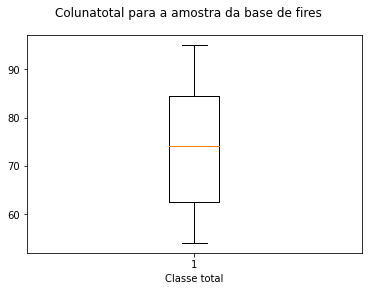

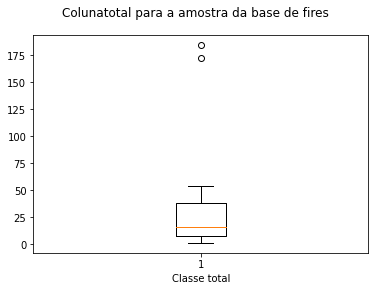

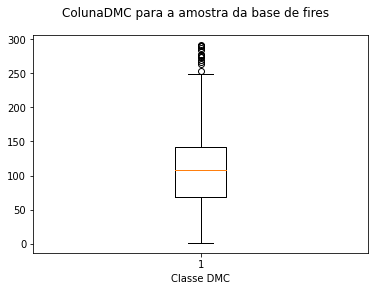

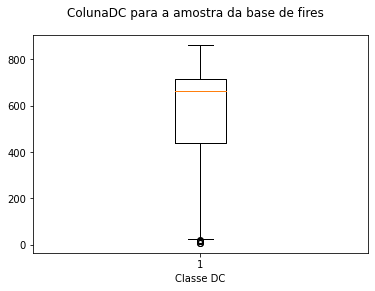

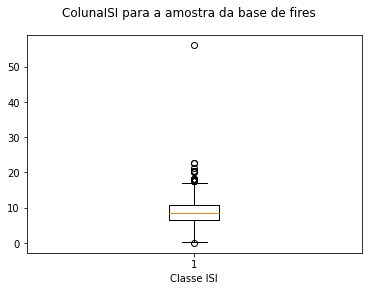

In [168]:
for value in list_columns:
    if value != 'day' and value != 'month':
        generate_graph_box(dfFires, value)
    else:
        dfaux = return_dataframe_groupyby(dfFires, value)
        generate_graph_box(dfaux, "total")



**Exercício 5.** Medidas de Associação

**Especificação**: imprima os gráficos de dispersão entre os atributos Dia e Mês, DMC e DC, DMC e ISI, e DC e ISI.

**Entregável**: implemente um programa que calcule e imprima os quatro gráficos de
dispersão definidos acima. Baseado nos gráficos de dispersão, comente sobre a
associatividade entre cada um dos quatro pares de atributos (correlação positiva,
correlação negativa, sem correlação, etc).


**Observação**: Os comentários sobre a associatividade entre os quatro pares de
atributos devem ser enviados em um arquivo PDF à parte.

In [91]:
def generate_graph_ass(dataframe, att, xatt):
    dfAuxiliar = dataframe.sort_values(by=xatt)
    
    plt.scatter(dfAuxiliar[att], dfAuxiliar[xatt])
    plt.gcf().set_size_inches(5, 7) 
    plt.show()  

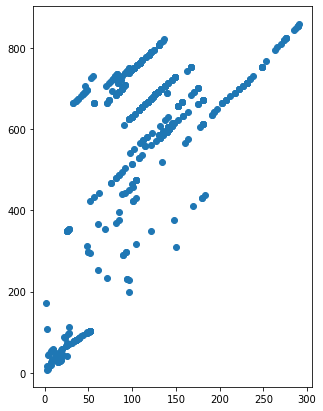

In [92]:
generate_graph_ass(dfFires,  "DMC", "DC")

DMC
day


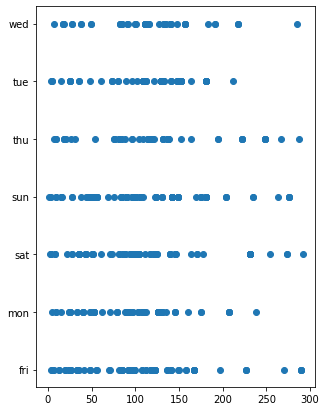

DMC
month


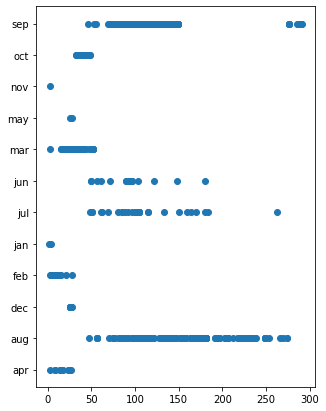

DMC
DC


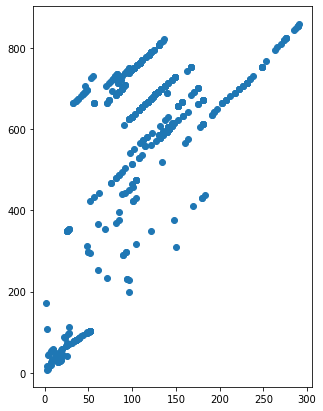

DMC
ISI


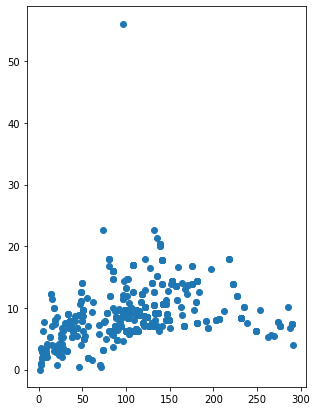

DC
day


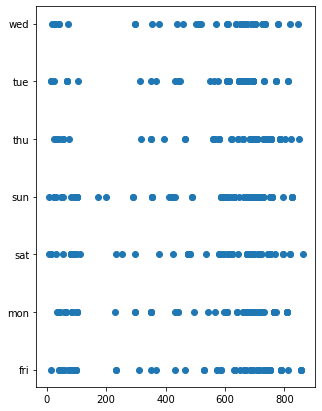

DC
day


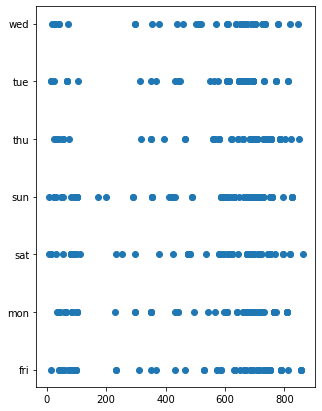

DC
ISI


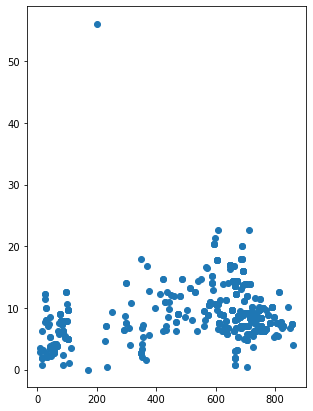

ISI
day


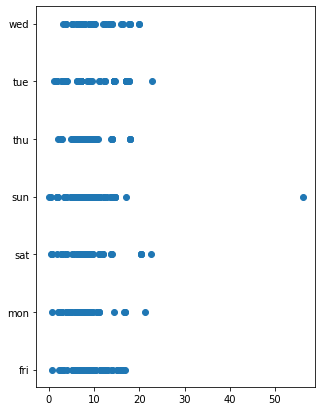

ISI
month


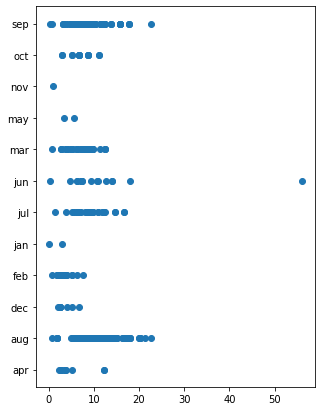

day
month


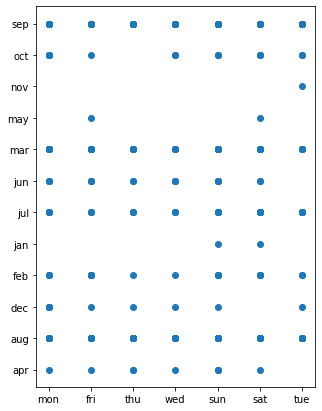

In [93]:
list_ass = ['DMC-day', 'DMC-month', 'DMC-DC', 'DMC-ISI', 'DC-day', 'DC-day', 'DC-ISI', 'ISI-day', 'ISI-month', 'day-month']
for value in list_ass:
    att, xatt = value.split('-')d
    print(att)
    print(xatt)

    
    generate_graph_ass(dfFires, att=att, xatt=xatt)